In this notebook, I open the galaxy redshift data from [Zhou et al.](https://doi.org/10.1093/mnras/stz1866). I filter the data and combine them into one set, to be used for the template learning. I also make plots to characterize the data, for use in the paper.

The actual data can be downloaded [here](http://d-scholarship.pitt.edu/36064/).

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.table import Table

In [9]:
# plotting style
%config InlineBackend.figure_format = 'retina'
plt.style.use('paper.mplstyle')

#### Load the Deep2/3 catalog:

In [132]:
cat = Table.read("data/DEEP2_uniq_Terapix_Subaru_v1.fits")
print("The Deep2/3 catalog contains",len(cat),"objects")

# quality cuts on data
uflag  = cat['u(sexflag)']
gflag  = cat['g(sexflag)']
rflag  = cat['r(sexflag)']
i2flag = cat['i2(sexflag)']
iflag  = cat['i(sexflag)']
zflag  = cat['z(sexflag)']
yflag  = cat['y(sexflag)']
cflag  = cat['flag_cfhtls']
zqual  = cat['zquality']
Class  = cat['class']

S = 16 # SExtractor flag

idx = np.where( (  uflag < S ) &
                (  gflag < S ) &
                (  rflag < S ) &
                ( i2flag < S ) &
                (  iflag < S ) &
                (  zflag < S ) &
                (  yflag < S ) &
                ( cflag == 0 ) &
                ( zqual >= 3 ) &
                ( Class == 'GALAXY' ) )

print("After quality cuts, we have",len(idx[0]),"objects")

# get the data
redshift  = cat['zhelio'][idx]

u  = cat['u_apercor'][idx]
g  = cat['g_apercor'][idx]
r  = cat['r_apercor'][idx]
i2 = cat['i2_apercor'][idx]
i  = cat['i_apercor'][idx]
z  = cat['z_apercor'][idx]
y  = cat['y_apercor'][idx]

uerr  = np.sqrt( cat['uerr_aper']**2 + cat['uerr_apercor']**2 )[idx]
gerr  = np.sqrt( cat['gerr_aper']**2 + cat['gerr_apercor']**2 )[idx]
rerr  = np.sqrt( cat['rerr_aper']**2 + cat['rerr_apercor']**2 )[idx]
i2err = np.sqrt( cat['i2err_aper']**2 + cat['i2err_apercor']**2 )[idx]
ierr  = np.sqrt( cat['ierr_aper']**2 + cat['ierr_apercor']**2 )[idx]
zerr  = np.sqrt( cat['zerr_aper']**2 + cat['zerr_apercor']**2 )[idx]
yerr  = np.sqrt( cat['yerr_aper']**2 + cat['yerr_apercor']**2 )[idx]

# remove any galaxies that have non-detections or 
# non-observations in any of the bands
idx = np.where( (  u != -99 ) &
                (  u !=  99 ) &
                (  g != -99 ) &
                (  g !=  99 ) &
                (  r != -99 ) &
                (  r !=  99 ) &
                ( i2 != -99 ) &
                ( i2 !=  99 ) &
                (  i != -99 ) &
                (  i !=  99 ) &
                (  z != -99 ) &
                (  z !=  99 ) &
                (  y != -99 ) &
                (  y !=  99 ) )

u,g,r,i2,i,z,y = u[idx],g[idx],r[idx],i2[idx],i[idx],z[idx],y[idx]
uerr,gerr,rerr,i2err,ierr,zerr,yerr = uerr[idx],gerr[idx],rerr[idx],i2err[idx],ierr[idx],zerr[idx],yerr[idx]

print("After removing any galaxies with non-detections or -observations in any band, we have",len(u),"objects")

The Deep2/3 catalog contains 23822 objects
After quality cuts, we have 14172 objects
After removing any galaxies with non-detections or -observations in any band, we have 5574 objects


(array([6.300e+02, 2.010e+03, 2.483e+03, 3.451e+03, 2.375e+03, 1.611e+03,
        1.197e+03, 3.550e+02, 5.800e+01, 2.000e+00]),
 array([0.00894258, 0.20589316, 0.40284374, 0.5997943 , 0.7967449 ,
        0.9936955 , 1.190646  , 1.3875966 , 1.5845473 , 1.7814978 ,
        1.9784484 ], dtype=float32),
 <a list of 10 Patch objects>)

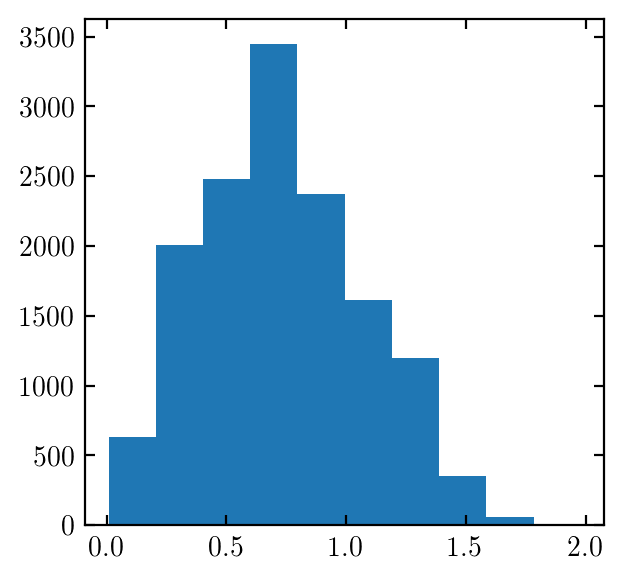

In [133]:
plt.hist(redshift)

#### Load the HST catalog

In [134]:
cat = Table.read("data/3D-HST_Terapix_Subaru_v1.fits")
print("The HST catalog contains",len(cat),"objects")

# remove objects that are also in DEEP2/3 catalog
deep2N = cat['objno_deep2']
idx = np.where( deep2N == -99 )
cat = cat[idx]
print("There are",len(cat),"objects that aren't in Deep2/3")

# quality cuts on data
uflag  = cat['u(sexflag)']
gflag  = cat['g(sexflag)']
rflag  = cat['r(sexflag)']
i2flag = cat['i2(sexflag)']
iflag  = cat['i(sexflag)']
zflag  = cat['z(sexflag)']
yflag  = cat['y(sexflag)']
cflag  = cat['flag_cfhtls']
zqual  = cat['use_zgrism1']

S = 16 # SExtractor flag

idx = np.where( (  uflag < S ) &
                (  gflag < S ) &
                (  rflag < S ) &
                ( i2flag < S ) &
                (  iflag < S ) &
                (  zflag < S ) &
                (  yflag < S ) &
                ( cflag == 0 ) &
                ( zqual == 1 ) )

print("After quality cuts, we have",len(idx[0]),"objects")

# get the data
redshift  = cat['z_max_grism'][idx]

u  = cat['u_apercor'][idx]
g  = cat['g_apercor'][idx]
r  = cat['r_apercor'][idx]
i2 = cat['i2_apercor'][idx]
i  = cat['i_apercor'][idx]
z  = cat['z_apercor'][idx]
y  = cat['y_apercor'][idx]

uerr  = np.sqrt( cat['uerr_aper']**2 + cat['uerr_apercor']**2 )[idx]
gerr  = np.sqrt( cat['gerr_aper']**2 + cat['gerr_apercor']**2 )[idx]
rerr  = np.sqrt( cat['rerr_aper']**2 + cat['rerr_apercor']**2 )[idx]
i2err = np.sqrt( cat['i2err_aper']**2 + cat['i2err_apercor']**2 )[idx]
ierr  = np.sqrt( cat['ierr_aper']**2 + cat['ierr_apercor']**2 )[idx]
zerr  = np.sqrt( cat['zerr_aper']**2 + cat['zerr_apercor']**2 )[idx]
yerr  = np.sqrt( cat['yerr_aper']**2 + cat['yerr_apercor']**2 )[idx]

# remove any galaxies that have non-detections or 
# non-observations in any of the bands
idx = np.where( (  u != -99 ) &
                (  u !=  99 ) &
                (  g != -99 ) &
                (  g !=  99 ) &
                (  r != -99 ) &
                (  r !=  99 ) &
                ( i2 != -99 ) &
                ( i2 !=  99 ) &
                (  i != -99 ) &
                (  i !=  99 ) &
                (  z != -99 ) &
                (  z !=  99 ) &
                (  y != -99 ) &
                (  y !=  99 ) )

u,g,r,i2,i,z,y = u[idx],g[idx],r[idx],i2[idx],i[idx],z[idx],y[idx]
uerr,gerr,rerr,i2err,ierr,zerr,yerr = uerr[idx],gerr[idx],rerr[idx],i2err[idx],ierr[idx],zerr[idx],yerr[idx]

print("After removing any galaxies with non-detections or -observations in any band, we have",len(u),"objects")

The HST catalog contains 14462 objects
There are 12546 objects that aren't in Deep2/3
After quality cuts, we have 1706 objects
After removing any galaxies with non-detections or -observations in any band, we have 586 objects


(array([ 20.,  48., 296., 436., 315., 287., 212.,  41.,  37.,  14.]),
 array([0.08275 , 0.406149, 0.729548, 1.052947, 1.376346, 1.699745,
        2.023144, 2.346543, 2.669942, 2.993341, 3.31674 ]),
 <a list of 10 Patch objects>)

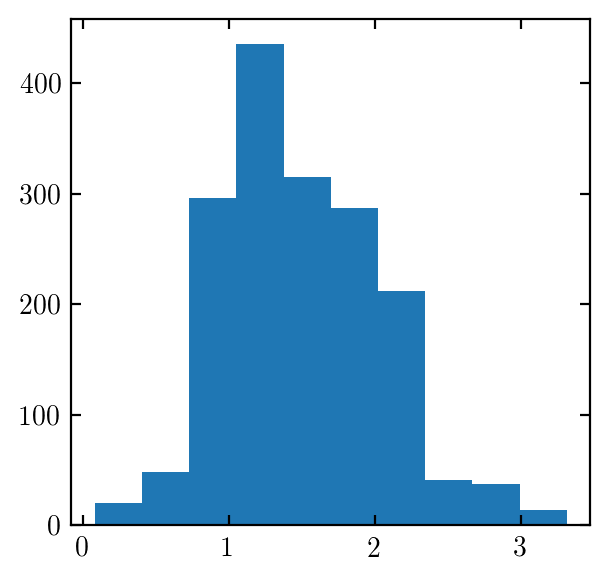

In [135]:
plt.hist(redshift)